In [1]:
import os
import sys

# Data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn utility classes & functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Scikit Learn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), '../'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from src.data.player_data import player_data
from src.model.metrics import measure_estimators, regression_accuracy

np.random.seed(42)

# Get player ratings

In [2]:
player_df = player_data(aggregate=False)
player_df

/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Returning data from 1965-01-01 to 2018-10-16

  warnings.warn(x, RRuntimeWarning)




|==                                                    |  4% ~3 s remaining

 

 

 

 

 


/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Downloading data


  warnings.warn(x, RRuntimeWarning)




|===                                                   |  7% ~4 s remaining

 

 

 

 

 


|====                                                  |  9% ~4 s remaining

 

 

 

 

 


|======                                                | 11% ~5 s remaining

 

 

 

 

 


|=======                                               | 13% ~5 s remaining

 

 

 

 

 


|========                                              | 16% ~5 s remaining

 

 

 

 

 


|=========                                             | 18% ~5 s remaining

 

 

 

 

 


|==========                                            | 20% ~5 s remaining

 

 

 

 

 


|============                                          | 22% ~5 s remaining

 

 

 

 

 


|=============                                         | 24% ~5 s remaining

 

 

 

 

 


|==============                                        | 27% ~5 s remaining

 

 

 

 

 


|===============                                       | 29% ~4 s re

/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Finished downloading data. Processing XMLs


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  396 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual file                                             expected   <int> <chr> <chr>      <chr>  <chr>                                            actual 1  8713 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' file 2  8714 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' row 3  8715 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' col 4  8716 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' expected 5  8717 Round an integer QF     '

,at_home,behinds,bounces,clangers,clearances,contested_marks,contested_possessions,cum_games_played,frees_against,frees_for,...,oppo_score,oppo_team,rebounds,round_number,score,tackles,team,time_on_ground,uncontested_possessions,year
id,,,,,,,,,,,,,,,,,,,,,
1000108421995,1,1.000000,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,...,87,Adelaide,0.000000,5.0,144,1.000000,Sydney,0.0,0.0,1995
1000108591995,1,0.500000,0.0,0.000000,0.000000,0.0,0.0,3,1.250000,0.500000,...,60,Carlton,0.000000,8.0,132,2.000000,Sydney,0.0,0.0,1995
1000108721995,1,0.400000,0.0,0.000000,0.000000,0.0,0.0,4,1.000000,0.400000,...,116,Richmond,0.000000,9.0,90,2.400000,Sydney,0.0,0.0,1995
1000109041995,1,0.333333,0.0,0.000000,0.000000,0.0,0.0,8,0.777778,0.222222,...,119,Essendon,0.000000,13.0,138,1.777778,Sydney,0.0,0.0,1995
1000109111995,1,0.400000,0.0,0.000000,0.000000,0.0,0.0,9,0.700000,0.200000,...,119,St Kilda,0.000000,14.0,94,1.600000,Sydney,0.0,0.0,1995
1000110021996,1,0.461538,0.0,0.000000,0.000000,0.0,0.0,12,0.846154,0.461538,...,100,Fremantle,0.000000,2.0,71,1.307692,Sydney,0.0,0.0,1996
1000110081996,1,0.428571,0.0,0.000000,0.000000,0.0,0.0,13,0.785714,0.428571,...,73,Collingwood,0.000000,3.0,107,1.214286,Sydney,0.0,0.0,1996
1000110251996,1,0.437500,0.0,0.000000,0.000000,0.0,0.0,15,1.062500,0.375000,...,76,Hawthorn,0.000000,5.0,88,1.250000,Sydney,0.0,0.0,1996
1000110281996,1,0.411765,0.0,0.000000,0.000000,0.0,0.0,16,1.117647,0.470588,...,90,Essendon,0.000000,6.0,90,1.294118,Sydney,0.0,0.0,1996


In [3]:
# Set up & split data for models

player_features = pd.get_dummies(player_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
player_labels = pd.Series(player_df['score'] - player_df['oppo_score'], name='score_diff')
data = train_test_split(player_features, player_labels)

In [4]:
# Pass data to models & measure performance

estimators = (ExtraTreesRegressor(n_estimators=100),
              GradientBoostingRegressor(),
              XGBRegressor())

estimator_scores = measure_estimators(estimators, data, model_type='regression', accuracy=False)
estimator_scores

Training ExtraTreesRegressor
ExtraTreesRegressor done
Training GradientBoostingRegressor
GradientBoostingRegressor done
Training XGBRegressor
XGBRegressor done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,ExtraTreesRegressor,0.0,2.833903,0.0,0.117789,cv
1,GradientBoostingRegressor,0.0,32.228050,0.0,0.104959,cv
2,XGBRegressor,0.0,32.188534,0.0,0.095165,cv
3,ExtraTreesRegressor,0.0,2.033375,NaN,NaN,test
4,GradientBoostingRegressor,0.0,32.206261,NaN,NaN,test
5,XGBRegressor,0.0,32.157263,NaN,NaN,test


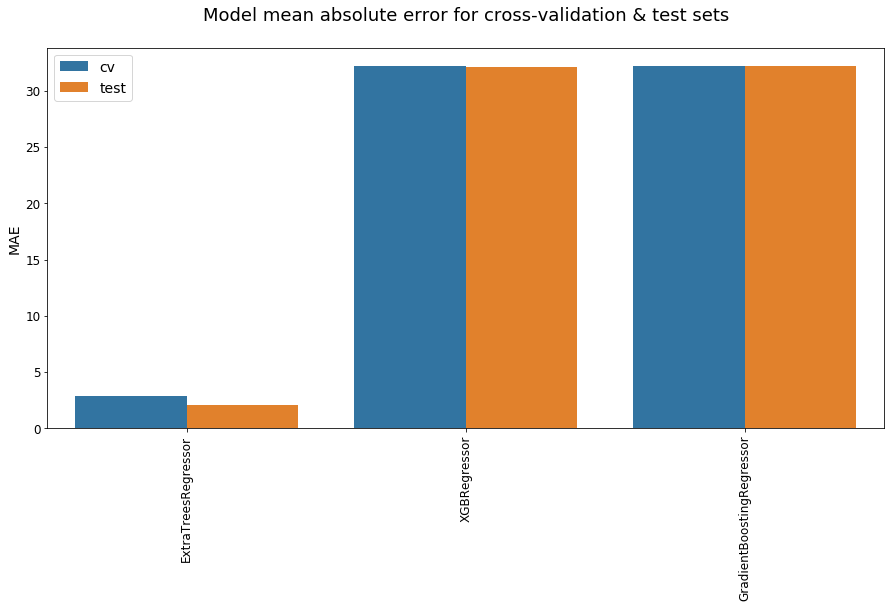

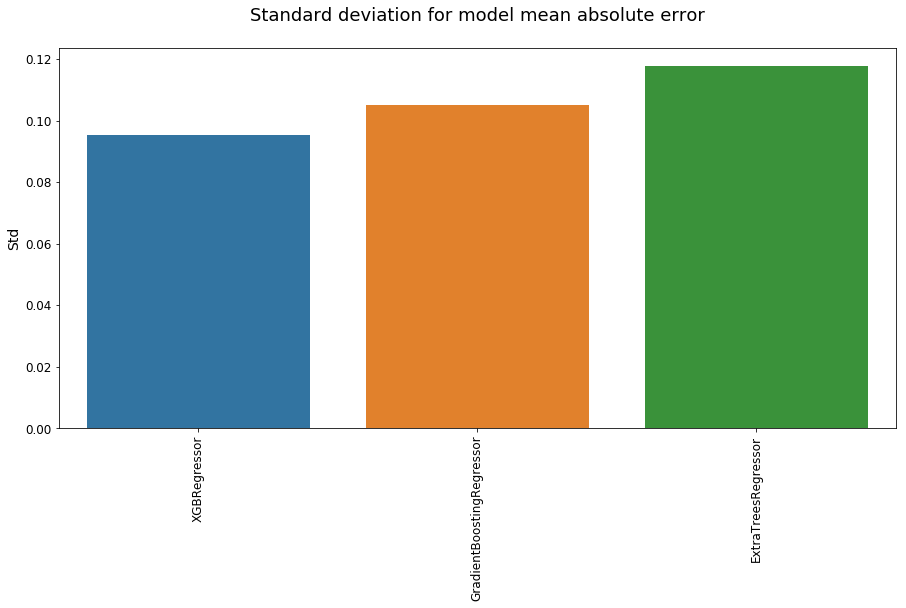

In [6]:
# MAE scores
mae_scores = estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=mae_scores)
plt.ylim()
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
std_scores = mae_scores[mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

In [39]:
xtr = make_pipeline(StandardScaler(), XGBRegressor())

predictions = []
years = []

for year in range(1966, 2017):
    X_train = player_features[player_features['year'] < year]
    X_test = player_features[player_features['year'] == year]
    y_train = player_labels.loc[X_train.index]
    y_test = player_labels.loc[X_test.index]
    
    xtr.fit(X_train, y_train)
    predictions.extend(xtr.predict(X_test))
    
player_ratings = pd.Series(predictions, index=player_features[(player_features['year'] >= 1966) & (player_features['year'] <= 2016)].index)
player_ratings

id
1000108421995   -54.929100
1000108591995   -35.149155
1000108721995   -37.021931
1000109041995   -41.764996
1000109111995   -13.482343
1000110021996    10.278709
1000110081996   -45.622425
1000110251996     1.429351
1000110281996   -13.341376
1000110561996    25.346348
1000110811996    -9.174973
1000110971996    11.715686
1000111131996    29.244997
1000111281996    58.995056
1000111611996    17.293692
1000111661996    46.582947
1000111711996    41.277679
1000111891997   -25.250916
1000112191997   -35.019848
1000112401997   -42.325684
1000112611997   -41.130070
1000112761997   -24.348143
1000112971997    -8.374694
1000113041997     3.680968
1000113311997   -33.073231
1000113451997   -24.012781
1000113701998     3.354279
1000113781998   -24.522522
1000113961998     1.429351
1000114041998   -33.073231
                   ...    
9992861985       -3.202425
9992931985       -4.725152
9993041985      -12.321692
9993321985       -4.273982
9993391985      -11.292899
9993441985       -7.34311

The idea is to use a regressor to predict match margins based on each individual player's in-game stats (rolling mean) and use the sum of these predictions as a player rating feature.

# Aggregate player ratings for team predictions

In [31]:
MATCH_STATS_COLS = ['at_home', 'score', 'oppo_score']


def oppo_features(data_frame):
    column_translations = {'oppo_team': 'team', 'player_rating': 'oppo_player_rating'}

    return (data_frame
            .loc[:, ['year', 'round_number', 'oppo_team', 'player_rating']]
            # We switch out oppo_team for team in the index,
            # then assign feature as oppo_{feature_column}
            .rename(columns=column_translations)
            .set_index(['team', 'year', 'round_number'])
            .sort_index()
            .loc[:, 'oppo_player_rating'])

# Filter out player_id & add brownlow stats
player_aggs = {'player_rating': 'sum'}
# Since match stats are the same across player rows, taking the mean
# is the easiest way to aggregate them
match_aggs = {col: 'mean' for col in MATCH_STATS_COLS}

aggregations = {**player_aggs, **match_aggs}

rating_df = (pd
             .concat([player_df[['team', 'year', 'round_number', 'oppo_team', 'score', 'oppo_score', 'at_home']],
                       player_ratings.rename('player_rating')], axis=1, sort=True)
             .dropna()
             .groupby(['team', 'year', 'round_number', 'oppo_team'])
             .aggregate(aggregations)
             .reset_index()
             .drop_duplicates(subset=['team', 'year', 'round_number'])
             .set_index(['team', 'year', 'round_number'], drop=False))

model_df = pd.concat([rating_df, oppo_features(rating_df)], axis=1, sort=True)
model_df

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1.0                   Adelaide  1991           1.0   
                      2.0                   Adelaide  1991           2.0   
                      3.0                   Adelaide  1991           3.0   
                      4.0                   Adelaide  1991           4.0   
                      5.0                   Adelaide  1991           5.0   
                      6.0                   Adelaide  1991           6.0   
                      7.0                   Adelaide  1991           7.0   
                      9.0                   Adelaide  1991           9.0   
                      10.0                  Adelaide  1991          10.0   
                      11.0                  Adelaide  1991          11.0   
                      12.0                  Adelaide  1991          12.0   
                      13.0                  Adelaide  1991          13.0   
                      14.0                  Adelaide  1991          14.0   
                      16.0                  Adelaide  1991          16.0   
                      17.0                  Adelaide  1991          17.0   
                      18.0                  Adelaide  1991          18.0   
                      20.0                  Adelaide  1991          20.0   
                      21.0                  Adelaide  1991          21.0   
                      22.0                  Adelaide  1991          22.0   
                      24.0                  Adelaide  1991          24.0   
                 1992 1.0                   Adelaide  1992           1.0   
                      3.0                   Adelaide  1992           3.0   
                      4.0                   Adelaide  1992           4.0   
                      5.0                   Adelaide  1992           5.0   
                      6.0                   Adelaide  1992           6.0   
                      7.0                   Adelaide  1992           7.0   
                      8.0                   Adelaide  1992           8.0   
                      9.0                   Adelaide  1992           9.0   
                      10.0                  Adelaide  1992          10.0   
                      11.0                  Adelaide  1992          11.0   
...                                              ...   ...           ...   
Western Bulldogs 2015 18.0          Western Bulldogs  2015          18.0   
                      20.0          Western Bulldogs  2015          20.0   
                      21.0          Western Bulldogs  2015          21.0   
                      22.0          Western Bulldogs  2015          22.0   
                      23.0          Western Bulldogs  2015          23.0   
                      24.0          Western Bulldogs  2015          24.0   
                 2016 1.0           Western Bulldogs  2016           1.0   
                      2.0           Western Bulldogs  2016           2.0   
                      3.0           Western Bulldogs  2016           3.0   
                      4.0           Western Bulldogs  2016           4.0   
                      5.0           Western Bulldogs  2016           5.0   
                      6.0           Western Bulldogs  2016           6.0   
                      7.0           Western Bulldogs  2016           7.0   
                      8.0           Western Bulldogs  2016           8.0   
                      9.0           Western Bulldogs  2016           9.0   
                      10.0          Western Bulldogs  2016          10.0   
                      11.0          Western Bulldogs  2016          11.0   
                      12.0          Western Bulldogs  2016          12.0   
                      13.0          Western Bulldogs  2016          13.0   
                      16.0          Western Bulldogs  2016          16.0   
                    

In [32]:
# Set up & split data for models

model_features = pd.get_dummies(model_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
model_labels = pd.Series(model_df['score'] - model_df['oppo_score'], name='score_diff')
model_data = train_test_split(model_features, model_labels)

In [36]:
# Pass data to models & measure performance

model_estimators = (Lasso(),
                    ElasticNet(),
                    Ridge(),
                    LinearSVR(),
                    AdaBoostRegressor(n_estimators=100),
                    BaggingRegressor(),
                    ExtraTreesRegressor(n_estimators=100),
                    GradientBoostingRegressor(),
                    RandomForestRegressor(n_estimators=100),
                    SVR(kernel='rbf', gamma='auto'),
                    XGBRegressor())

model_estimator_scores = measure_estimators(model_estimators, model_data, model_type='regression')
model_estimator_scores

Training Lasso
Lasso done
Training ElasticNet
ElasticNet done
Training Ridge
Ridge done
Training LinearSVR
LinearSVR done
Training AdaBoostRegressor
AdaBoostRegressor done
Training BaggingRegressor
BaggingRegressor done
Training ExtraTreesRegressor
ExtraTreesRegressor done
Training GradientBoostingRegressor
GradientBoostingRegressor done
Training RandomForestRegressor
RandomForestRegressor done
Training SVR
SVR done
Training XGBRegressor
XGBRegressor done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,Lasso,0.615917,34.015182,0.005494,0.458100,cv
1,ElasticNet,0.617846,34.124936,0.006216,0.469414,cv
2,Ridge,0.614603,33.763768,0.007686,0.464453,cv
3,LinearSVR,0.614603,33.780326,0.008371,0.434355,cv
4,AdaBoostRegressor,0.606451,34.568548,0.008006,0.435542,cv
5,BaggingRegressor,0.617143,34.396998,0.009171,0.294079,cv
6,ExtraTreesRegressor,0.630905,34.376470,0.007205,0.386813,cv
7,GradientBoostingRegressor,0.642300,32.790290,0.007544,0.388754,cv
8,RandomForestRegressor,0.644228,32.951064,0.009502,0.245770,cv
9,SVR,0.616881,34.091790,0.004852,0.458406,cv


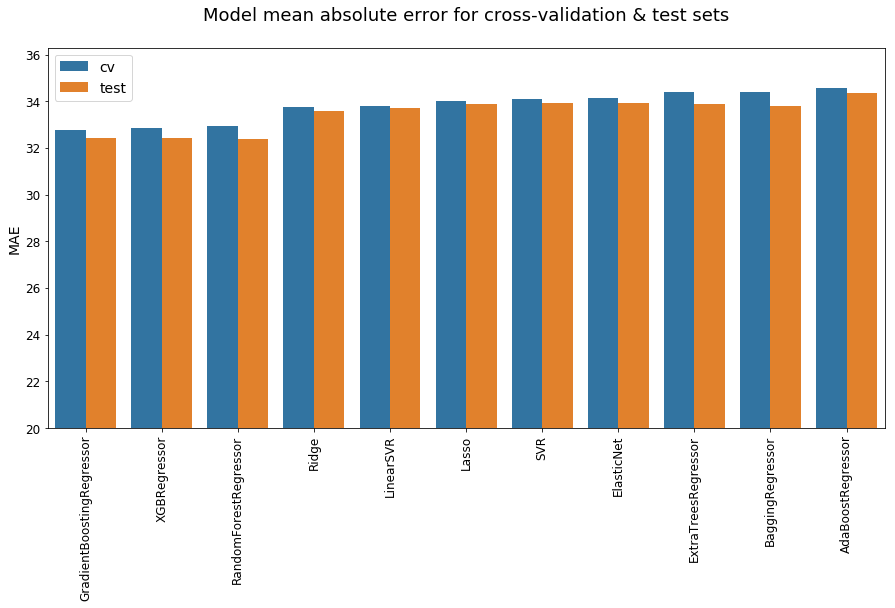

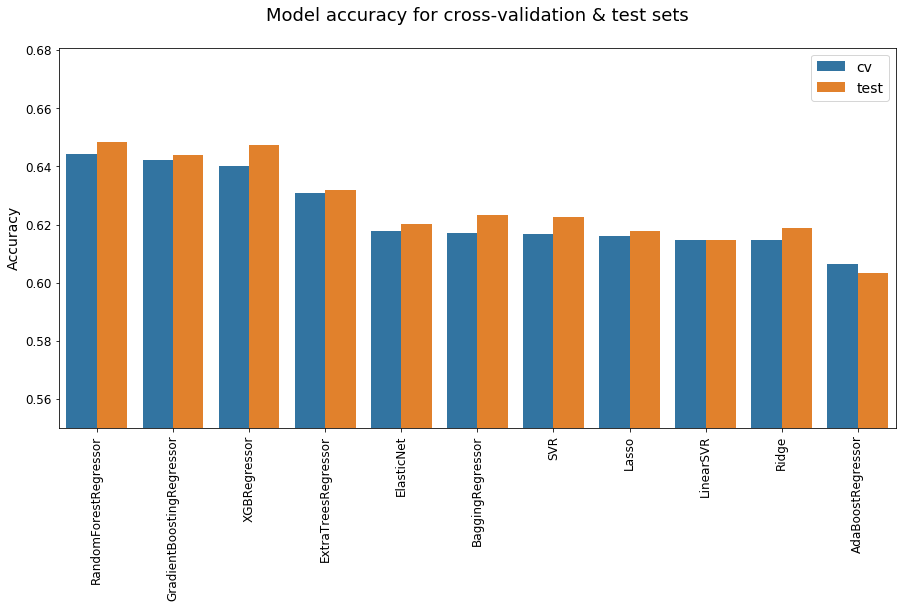

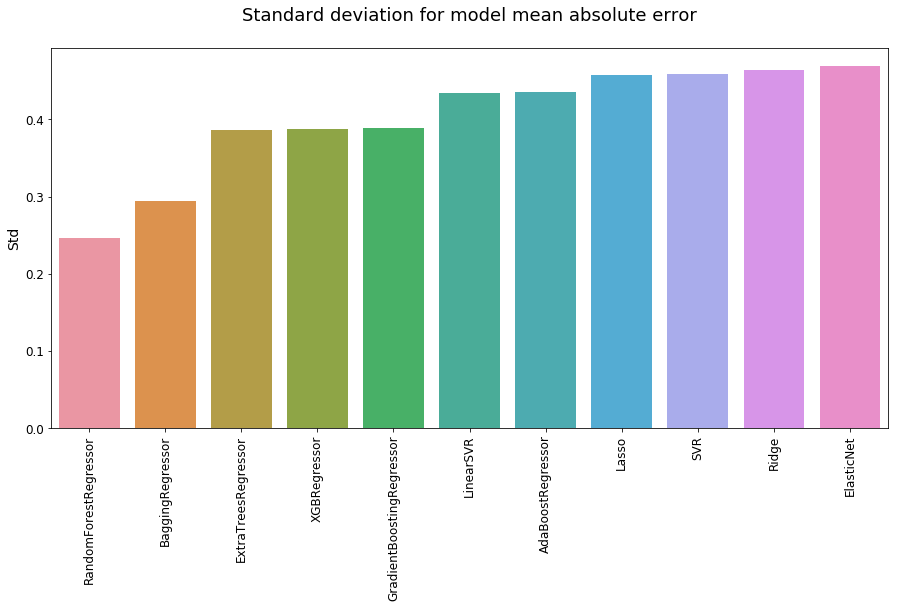

In [38]:
# MAE scores
model_mae_scores = model_estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=model_mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
model_acc_scores = model_estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=model_acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
model_std_scores = model_mae_scores[model_mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=model_std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

# Stacked player-rating model underperforms

There might be some opportunity for tuning and making this better for predicting match margins, but I'm better off focusing my efforts elsewhere.